In [52]:
import numpy as np

from sklearn.datasets import fetch_20newsgroups

from pprint import pprint

In [2]:
twenty_news=fetch_20newsgroups()

In [3]:
print(twenty_news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [4]:
pprint(twenty_news.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [5]:
len(twenty_news.data)

11314

In [6]:
twenty_news = fetch_20newsgroups(categories=['sci.med', 'sci.space'])

In [7]:
pprint(list(twenty_news.target_names))

['sci.med', 'sci.space']


In [9]:
len(twenty_news.data)

1187

In [15]:
print("\n".join(twenty_news.data[0].split("\n")[:5]))

From: flb@flb.optiplan.fi ("F.Baube[tm]")
Subject: Vandalizing the sky
X-Added: Forwarded by Space Digest
Organization: [via International Space University]
Original-Sender: isu@VACATION.VENARI.CS.CMU.EDU


In [16]:
print(twenty_news.target_names[twenty_news.target[0]])

sci.space


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vect = CountVectorizer(lowercase=True, ngram_range=(1, 1), min_df=5, binary=True)

In [20]:
X = vect.fit_transform(twenty_news.data)

In [21]:
X.shape

(1187, 5920)

In [23]:
vect.get_feature_names()[:10]

['00', '000', '0005', '01', '01wb', '02', '03', '0358', '0362', '04']

In [24]:
vect.get_feature_names()[-10:]

['z1',
 'zabriskie',
 'zcomm',
 'zealand',
 'zero',
 'zeus',
 'zisfein',
 'zmodem',
 'zoo',
 'zoology']

In [46]:
y = twenty_news.target
feature_names = vect.get_feature_names()
target_names = twenty_news.target_names

In [41]:
from sklearn import tree

In [57]:
clf = tree.DecisionTreeClassifier(max_depth=4)

In [58]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
import graphviz

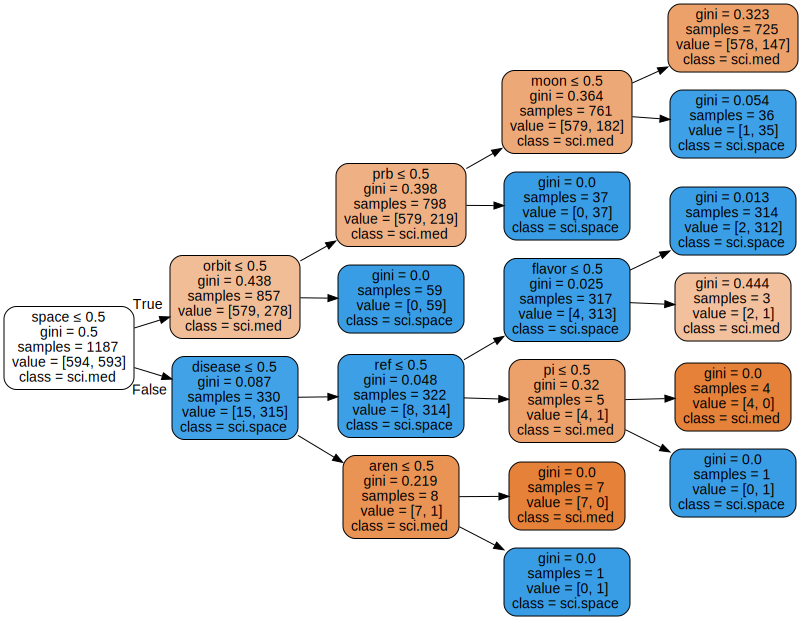

In [60]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names, class_names=target_names,
                                max_depth=None, 
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render()
graph

In [61]:
from sklearn.feature_selection import mutual_info_classif

In [51]:
mis = mutual_info_classif(X, y, discrete_features=True)

In [54]:
for i in np.argsort(mis)[::-1][:10]:
    print("%s:\t%0.4f" %(feature_names[i], mis[i]))

space:	0.1868
orbit:	0.0849
pitt:	0.0774
nasa:	0.0729
earth:	0.0656
moon:	0.0649
geb:	0.0649
gordon:	0.0647
disease:	0.0600
launch:	0.0588


In [62]:
fis = clf.feature_importances_

In [63]:
for i in np.argsort(fis)[::-1][:10]:
    print("%s:\t%0.4f" %(feature_names[i], mis[i]))

space:	0.1868
orbit:	0.0849
prb:	0.0466
moon:	0.0649
disease:	0.0600
ref:	0.0006
flavor:	0.0090
aren:	0.0000
pi:	0.0012
errors:	0.0001
